# Decision Tree

## Importações

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

## Dados

In [69]:
df = pd.read_csv('../data/dt_data.csv')
df.head()

,Filme,Ator,Categoria,Avaliação,Assistiu?
0,Bastador Inglórios,Brad Pitt,Ação,Mediana,Não
1,Porcos e Diamantes,Brad Pitt,Ação,Mediana,Não
2,Tróia,Brad Pitt,Ação,Baixa,Não
3,O curioso caso de Benjamin Button,Brad Pitt,Drama,Mediana,Não
4,Sr e Sra Smith,Brad Pitt,Romance,Baixa,Não


In [70]:
x,y = df.drop(['Filme','Assistiu?'],axis=1),df['Assistiu?']

In [71]:
ohe = OneHotEncoder().fit(x)
x_ohe = ohe.transform(x)

lb = LabelEncoder().fit(y)
y_lb = lb.transform(y)

# Modelagem

In [74]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(x_ohe,y_lb)

DecisionTreeClassifier(criterion='entropy', random_state=42)

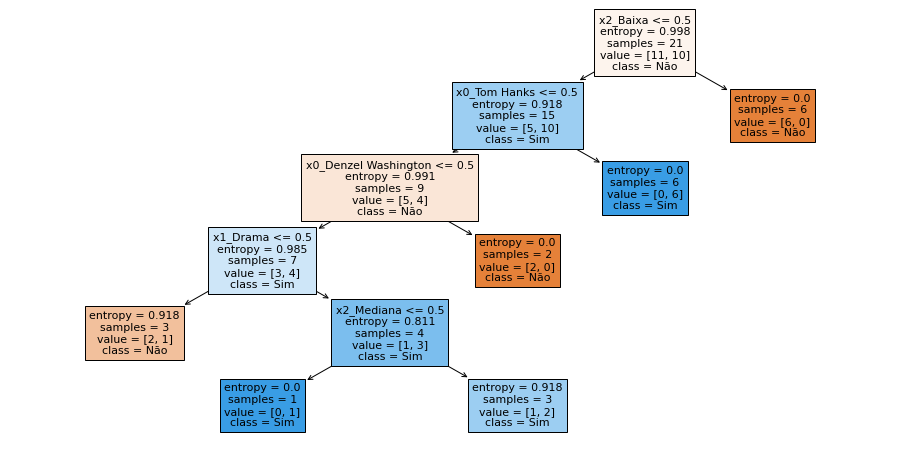

In [75]:
fig = plt.figure(figsize=(16,8))
_ = tree.plot_tree(dt, 
                   feature_names=ohe.get_feature_names(),  
                   class_names=['Não','Sim'],
                   filled=True)

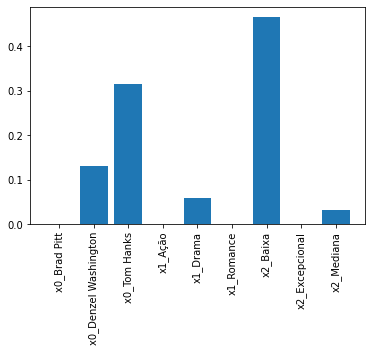

In [87]:
f, ax = plt.subplots()

ax.bar(x=range(len(dt.feature_importances_)),height=dt.feature_importances_)
ax.set_xticks(range(len(dt.feature_importances_)))
ax.set_xticklabels(ohe.get_feature_names(),rotation=90)

plt.show()

In [92]:
ohe.get_feature_names()

array(['x0_Brad Pitt', 'x0_Denzel Washington', 'x0_Tom Hanks', 'x1_Ação',
       'x1_Drama', 'x1_Romance', 'x2_Baixa', 'x2_Excepcional',
       'x2_Mediana'], dtype=object)

In [94]:
dt.predict([[0,0,1,1,0,0,0,1,0]])

array([1])

In [95]:
dt.predict_proba([[0,0,1,1,0,0,0,1,0]])

array([[0., 1.]])